In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
path = './instances/R168.TXT'

In [3]:
solution = """0 0.0 556 18.601075237738275 207 43.60107523773827 316 104.60107523773827 20 136.55557363783842 132 156.85120377882544 313 178.51310756851603 315 212.28283621652545 0 294.3175500703335
0 0.0 461 76.05918747922567 2 87.47340104159876 540 139.66344726105675 481 153.90608794817604 255 173.75494574997214 562 194.93528563747108 489 206.3494991998442 224 231.11432226007759 543 812 346 853.890437438204 459 889.385535006168 429 942.4320215062297 68 956.9041574612293 0 1029.9676175629395
0 0.0 4 31.38470965295043 22 59.74226940363626 221 84.60833815095476 354 101.81944070188274 336 121.03898515917562 0 175.31087240153295
0 0.0 432 52.009614495783374 256 93.02573933432502 365 114.68764312401562 37 139.24786290257666 154 160.4282027900756 219 185.4614991684485 177 196.4614991684485 423 252.7864384560504 0 330.26236008739977
0 0.0 373 602 533 636.0416305603426 180 722.048209222982 149 735.653760498446 146 767.7444825328205 367 815.7444825328205 519 831.4013367823129 399 855.5434724060439 511 911.4237513938617 0 1021.1483722254297
0 0.0 72 726 281 759.3452350598575 190 780.7469893108489 46 800.7469893108489 517 824.9596597144008 53 856 491 873.6157731058639 458 931.6261886424951 136 944.7884663026634 587 965.0840964436504 91 999.104920742579 161 1062.8636409654414 364 1120.9572995910855 0 1154.0440923523158
0 0.0 183 139.62807740565648 321 175.57032094780217 279 215.98413359929327 211 739 8 818 391 834.7082039324994 69 863.4964981605553 83 886.5349029709606 573 917.1504310990489 173 943.3059255204524 90 955.5419934979523 499 1009.9492001203013 0 1108.9716691941255
0 0.0 233 17.26267650163207 176 84.69089256307699 205 133.7037109693393 335 167.47343961734873 241 190.51184442775403 152 201.92605799012713 298 215.0883356502955 44 234.5223167823521 329 268.05952137423174 496 288.2575604014173 529 320.1892726008786 143 342.35479766147506 96 356.4779032870927 339 383.121220264186 117 470.4387473844968 0 505.51861979246576
0 0.0 369 50.60632371551998 196 123.61425972361343 217 190.01461433242773 591 221.03841037405635 76 789 165 816.0 588 843.088007490635 426 891.3633259086444 0 1019.4819103905115
0 0.0 451 56.08029957123981 546 77.26063945873875 36 804 174 829.52417469626 162 847.5864324445586 332 900.8646024613233 596 933.4256308066803 115 944.4256308066803 232 970.70445140278 213 994.9171218063319 506 1045.277993947553 0 1165.9577120534464
0 0.0 269 46.238512086787566 109 63.30957989865304 421 100.30957989865304 31 121.07990951292204 240 139.32612076415734 439 155.15707265900264 3 180.2898186094242 181 876 0 978.655275079188
0 0.0 326 152 380 184.3606797749979 472 493 442 506.605551275464 418 521.605551275464 575 560.8801136120729 544 575.3522495670725 290 604.2202118311857 129 642.8558539577384 0 768.6012642339131
0 0.0 175 61.07372593840988 515 106 345 137.93171219946132 428 160.58082284013483 498 186.23329868263335 66 198.46936666013315 63 210.70543463763295 570 234.0470987017593 60 292.8733211646941 106 317.906617543067 0 360.55627297769604
0 0.0 488 95.81753492967766 57 119.95967055340861 457 139.01505569154602 17 807 82 833.2788205960996 238 853.3286962172206 25 876.3286962172206 371 913.9873295890992 234 946.3480093640972 0 991.3480093640972
0 0.0 563 53.150729063673246 469 242 226 270.4390889145858 158 288.0548620204497 86 309.4566162714411 333 335.9490387739117 337 356.9490387739117 18 375.9490387739117 84 401.6015146164102 223 448.3982536023584 145 484.030264838311 0 556.4642299534628
0 0.0 583 95.46203433826454 81 124.488331928705 21 363 11 376.605551275464 525 396.605551275464 445 441.53404966860995 396 843 377 858.0 208 869.0 527 897.788294228056 0 972.788294228056
0 0.0 375 85.90692637965812 579 103.71717605556478 27 157.2832178771487 284 172.3822373907415 553 202.40722178524229 600 305 297 325.295630140987 289 360.7907277089509 407 372.204941271324 476 434.6072312976196 437 499 350 520.7046999107197 360 572.9065956027381 0 667.552918617976
0 0.0 204 566 24 585.8994949366116 490 611.7108832374536 503 677.5141089506684 314 718.6268073228765 395 748.3245229264687 35 768.2240178630803 51 798.8395459911686 524 811.0756139686684 513 853.1380530524312 215 900.7811135018686 277 966.8614130731085 0 1050.6448800558953
0 0.0 50 61.66036003787198 229 77.04552484500648 73 95.64785011204911 113 800 508 820.816653826392 200 837.8877216382575 523 859.0680615257564 193 871.3041295032563 265 883.3041295032563 474 899.6286848235931 318 928.6286848235931 276 973.4137390854453 0 1028.101545028454
0 0.0 586 60.8276253029822 495 88.54767044965155 347 145.4091685050915 179 242 9 899 202 913.1231056256177 416 943.1231056256177 419 962.9719634274138 246 978.8029153222591 444 1012.8237396211877 443 1023.8237396211877 366 1042.0699508724229 88 1063.7746507831425 235 1125.8130981081733 0 1172.8266091548169
0 0.0 153 32.55764119219941 463 59.820317693831484 293 91.911039728206 125 587 137 608.6619037896907 286 640.593615989152 485 678.2522493610306 431 701.2522493610306 598 722.4325892485296 409 751.114130940799 270 767.5172551782318 283 791.445643455416 157 816.4789398337889 359 880.5159641782141 0 912.5386797237593
0 0.0 263 13 417 33.19803902718557 114 76.57467756374285 464 160.5814340120564 144 190.68118525429819 306 208.49143493020483 555 227.71097938749773 582 321 412 843 449 866.0 74 881.6568542494924 510 902.8371941369913 0 989.8047197565668
0 0.0 502 28.653097563788805 500 75.8686856956456 201 124.8173698839465 260 165.88181901796463 352 185.10136347525753 273 199.5734994302571 433 216.7846019811851 120 242.4051013329984 28 262.4549769541193 559 301.2473370518952 268 321.2473370518952 0 469.7861402804492
0 0.0 408 72.53275122315436 422 106.3024798711638 151 118.3024798711638 599 154 340 173.2195444572929 278 189.0504963521382 406 221.0504963521382 531 237.75870028463757 99 269.2993595131756 147 313.2993595131756 26 361.154345974671 0 422.57418650340077
0 0.0 243 76.36753236814714 311 89.97308364361113 79 124.15985688850678 549 427 468 490.0094331227943 462 553.6750645827892 294 776 448 789.1622776601683 405 814.0283464074869 594 839.0283464074869 486 857.6306716745295 0 928.4336321287706
0 0.0 356 39.6232255123179 127 131.951835363329 392 175 454 507 124 816 254 846.8806130178211 420 858.8806130178211 542 885.433558375068 571 923.5048960703043 438 938.8900608774388 67 964.5105602292522 110 1054.4417806628223 0 1152.9686127534376
0 0.0 212 93.68030742904295 403 141.7591729583625 209 432 164 450.6023252670426 552 470.5018202036543 440 487.57288801551977 325 504.78399056644776 487 520.7839905664478 342 536.614942461293 275 553.826045012221 537 580.4693619893143 0 734.5283776738594
0 0.0 138 48.83646178829912 42 72.29008583537282 574 140.8392105085906 521 158.0503130595186 569 172.17341868513626 480 190.41962993637156 59 206.5023924666698 203 250.70765521964393 324 276.832170716241 362 959 101 996.0739727413618 56 1022.3527933374614 0 1058.5252979940662
0 0.0 65 296 483 335.5465734053883 341 411.61472004202403 545 442.23024817011236 397 454.23024817011236 107 480.38574259151585 206 808 282 852.1760149812701 368 872.4716451222571 446 892.6696841494427 259 907.6696841494427 0 1032.4607987881636
0 0.0 150 49.24428900898052 475 81.17600120844183 387 97.57912544587468 425 150.76477120925304 328 169.98431566654594 393 209.25887800315485 539 256.05561698910304 78 336.2838164534208 550 371.83768113178206 0 404.398709477139
0 0.0 581 37.589892258425 497 140.6758740172269 547 272 131 292.63014581273467 242 310.2459189185986 98 341.62347724503053 532 745 307 760.8309518948453 355 813.7844150846744 163 898 0 981.7834669827869
0 0.0 118 41.048751503547585 514 107.48455574163744 379 123.80911106197419 218 145.4710148516648 133 163.53327259996334 323 178.0054085549629 195 190.2414765324627 466 209.2414765324627 95 250 102 267.28010988928054 526 326.77758457233887 0 377.08887331383164
0 0.0 172 30.675723300355934 288 77.07627274675852 551 124.18422337731747 477 143.6710563578226 363 157.79416198344026 361 174.50236591593963 568 188.10791719140363 389 215.10791719140363 0 312.4749590321344
0 0.0 310 58.52349955359813 411 69.52349955359813 578 108.67825902782462 48 154.18882083695402 168 617 330 654.6586333718786 320 670.9831886922154 572 722 427 737.3851648071345 0 843.0930537191778
0 0.0 15 767 400 791.8660687473185 304 821.1014528089898 1 836.1014528089898 220 868.5736578632341 70 879.5736578632341 236 902.6120626736393 30 920.6743204219379 460 937.8854229728659 415 981.4860182056888 155 1026.155889852408 435 1088.0210997719678 590 1105.8313494478743 0 1161.1082751385613
0 0.0 230 59.22837157984339 516 92.05379600087004 430 574 593 586.0 376 621.8069758011279 250 640.0531870523632 285 665.3502455931416 197 679.5928862802609 58 713.7796595251566 97 740.2720820276272 253 768.6568583384775 441 786.9030695897128 0 918.841578683436
0 0.0 322 53.225933528685054 353 112.07263249596431 178 134.23815755656076 184 145.65237111893387 100 164.59664302893304 29 202.2552764008117 128 240.11205295517993 122 627 264 641.1231056256177 186 661.1231056256177 0 701.5369182771087
0 0.0 239 11.704699910719626 331 92.72582352897844 116 767 478 779.2360679774998 94 800.8979717671905 77 822.9810177407851 580 833.9810177407851 303 884.8344141724161 257 909.8344141724161 0 953.2110527089734
0 0.0 93 99.24716620639605 34 243 141 262.48683298050514 381 279.69793553143313 301 300.7432965486204 494 354.675061821598 54 378.1286858686717 296 413.6237834366356 280 442.65008102707606 0 534.2834075549102
0 0.0 398 31.32091952673165 225 51.518958553917216 139 138 38 156.06225774829855 75 171.06225774829855 71 210.07949400539238 0 237.10888037131878
0 0.0 170 118.25819210524064 105 129.25819210524065 374 151.29978668403294 484 542 567 559.0710678118655 291 570.4852813742386 383 595.4852813742386 558 613.731492625474 300 632.2754963707915 452 666.2963206697201 123 707.3446700622402 0 807.394656181062
0 0.0 266 3.605551275463989 185 40.80849229293488 272 93.25846284651712 10 122.98154576983313 470 138.81249766467843 349 720 160 751.9317121994613 7 774.6596342608192 130 818.6302097637453 0 912.20053942685
0 0.0 13 7.280109889280518 436 48.8554166969744 479 77.10370428786906 247 93.42825960820582 414 121 267 133.0 6 155.04159457879229 261 207.7967112316562 0 239.8874332660307
0 0.0 166 36.796738985948195 348 57.092369126935196 245 89.89587762891796 597 138.07964381299152 40 159.25998370049047 504 185.25998370049047 126 219.30161426083308 103 248.94849696522158 248 264.7794488600669 401 279.7794488600669 522 295.4363031095593 413 311.09315735905165 302 361.59007082168483 0 384.39631929655053
0 0.0 134 182.5212316416915 530 206.12270215042693 585 227.82740206114656 576 239.82740206114656 5 258.0736133123819 189 292.15680246996646 119 310.75912773700907 358 339.9685004493076 312 369.28170836513556 92 418.11468404303076 404 490.9159579154611 222 535.1212206684353 0 572.1397328406479
0 0.0 271 782 140 807.6524758424986 467 830.0217927193515 121 864.2085659642472 450 888.3507015879782 505 912.4928372117091 194 1128 112 1145.6157731058638 16 1174.8511571675351 0 1197.0166822281315
0 0.0 104 36.235341863986875 43 78.06300278966597 386 139.15116188744517 424 161.87908394880301 33 215.70829795042528 534 238.74670276083057 49 751 295 778.1172427686237 447 796.6612465139413 23 809.4896736386875 548 828.4896736386875 55 870.2701708028288 87 900.1196040441081 372 953.9488180457304 343 1001.896149967751 0 1090.667972340983
0 0.0 338 48.83646178829912 501 600 62 634.5153013442625 385 648.6384069698802 210 670.6800015486725 561 701.2955296767608 584 721.3454052978817 334 757.2876488400274 142 777.1365066418235 287 820.6775263043204 188 852.7682483386949 0 957.6365781437463
0 0.0 39 85.47514258543241 384 139.7696117661326 249 181.5343721146698 135 204.06433620081145 317 221.13540401267693 390 517 509 536.4868329805051 191 561.3529017278237 111 580.5724461851165 308 597.2806501176159 108 619.6499669944689 507 641.8565226102025 538 766 0 819.2781700167648
0 0.0 169 88.07383266328314 493 114.22932708468664 251 136.27092166347893 214 148.27092166347893 566 195.91398211291636 357 213.724231788823 465 231.00434167810351 351 264.0260705445462 12 592 41 605.1622776601683 216 638.1622776601683 577 655.4423875494489 592 671.2733394442942 148 707.0803152454221 0 796.8925950023618
0 0.0 47 56.79788728465171 528 120.64953535599675 252 142.8150604165932 156 172.93967221409133 554 200.05691498271503 536 694 45 706.2360679774998 565 774.3136023604262 14 793.7475834924828 182 864.7803615711514 0 954.7803615711514
0 0.0 388 808 198 853.9026461420325 370 870.9026461420325 378 903.4636744873894 159 917.7063151745087 274 941.1599392215825 187 976.3392958456109 89 1012.5118005022157 309 1033.8255090012005 0 1099.1879511438663
0 0.0 167 35.38361202590826 560 85.69490076740101 482 439 19 470.2132034355964 80 933 305 963.6155281280883 541 978.6155281280883 473 993.7145476416811 520 1017.6429359188652 292 1035.8891471701004 434 1062.4420925273473 237 1095.5288852885776 0 1146.2474314315823
0 0.0 564 196 453 239.01514803843835 492 426 85 441.8309518948453 410 464.86935670525065 52 481.57756063775 455 508.6655681283851 595 529.7109291455723 227 552.3600397862458 535 584.7207195612438 262 639.9092136720237 456 657.1203162229517 518 688.1203162229517 0 771.4551646921482
0 0.0 199 110.63453348751464 32 150.36667098215165 344 173.9681414908871 258 189.06716100447989 228 221.5393660587241 231 239.78557730995942 171 262.82398212036475 402 274.82398212036475 382 291.2271063577976 64 313.2687009365899 0 424.24394542750457
0 0.0 299 128.75169901791588 327 271 557 313.0624390837628 471 330.1335068956283 319 366.21031651643887 512 379.37259417660727 589 408.6858020924352 394 483 61 770 192 825.0111097397076 244 855.4071877940788 0 948.377061844845
""".split('\n')

In [4]:
def to_point(line):
    mapping = ['number', 'x', 'y', 'demand', 'ready_time', 'due_date', 'service_time']
    line = line.replace('\n', '').split()
    return {k:int(v) for k,v in zip(mapping, line)}

In [5]:
with open(path, 'r') as f:
    data = f.readlines()
points = list(map(to_point, data[9:]))

In [6]:
G = nx.Graph()
G.add_nodes_from(range(len(points)))
for route in solution:
    G.add_path(list(map(int, route.split()[::2])))

In [7]:
paths = []
for route in solution:
    path = []
    route = list(map(int, route.split()[::2]))
    for i in range(len(route) - 1):
        path.append((route[i], route[i+1]))
    paths.append(path)

c:\users\gzhigalov\documents\programs\miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


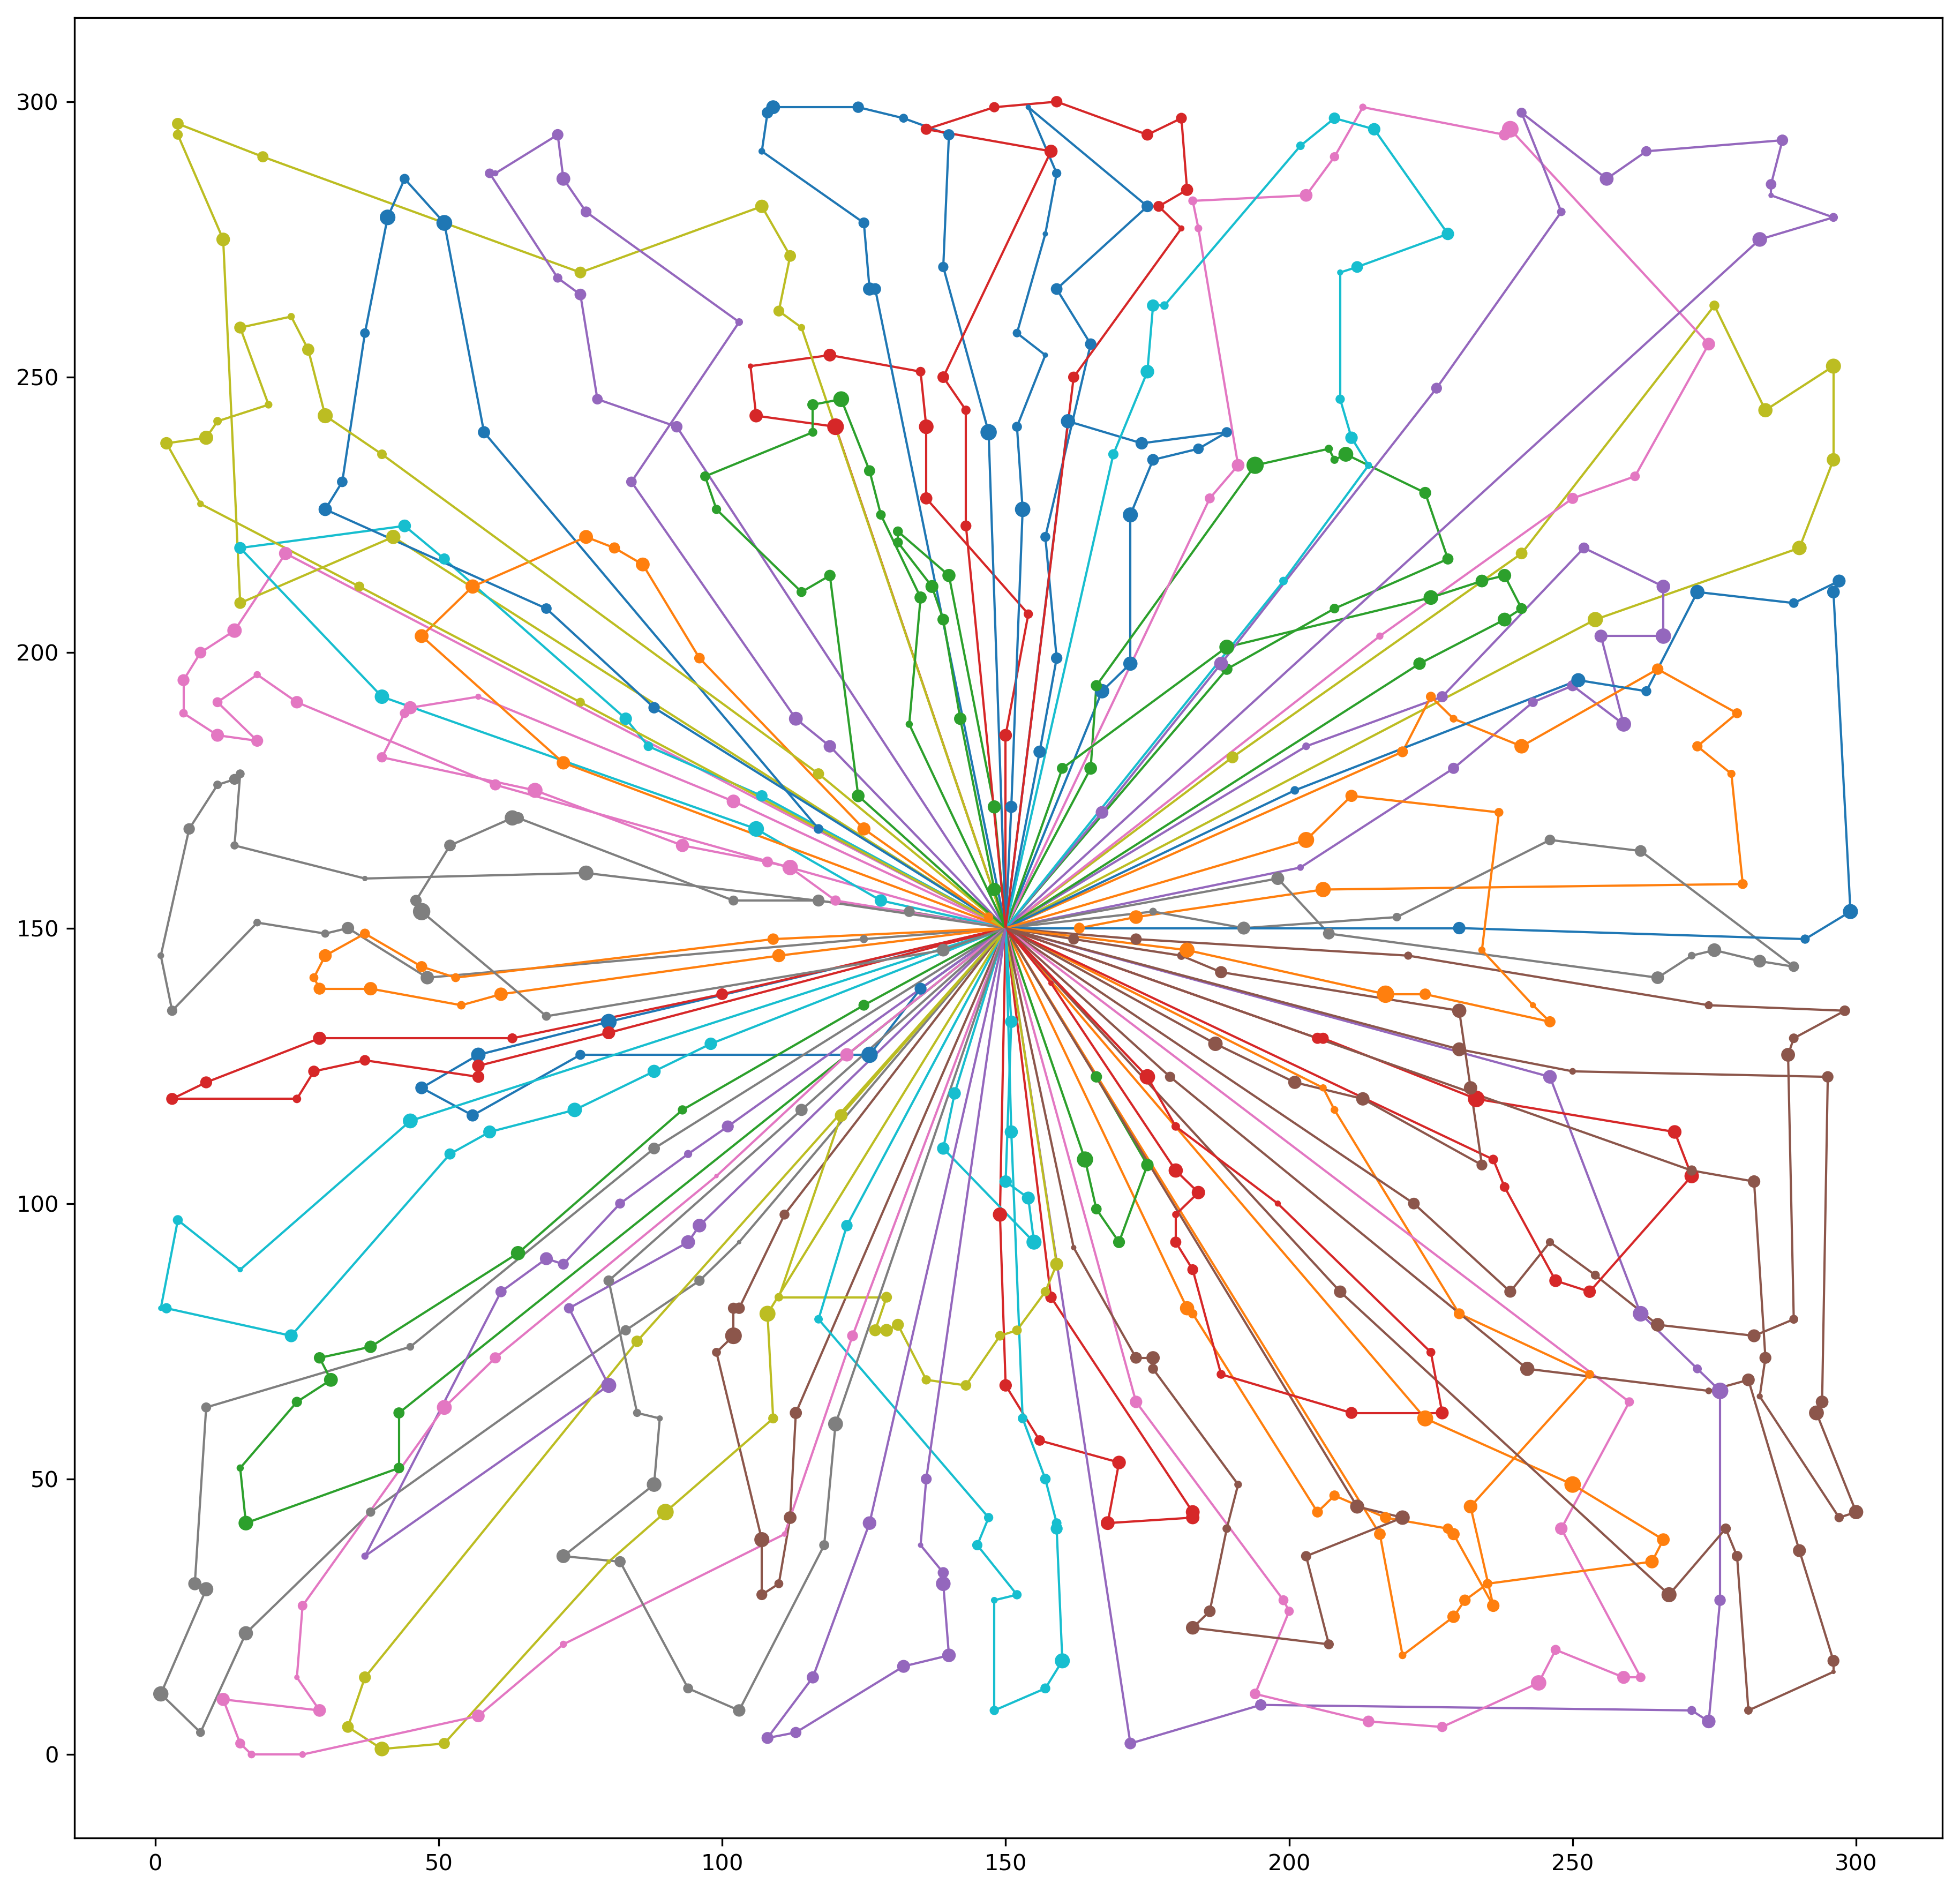

In [8]:
from itertools import cycle
col = cycle(colors.TABLEAU_COLORS)
# pos = nx.spring_layout(G)
pos = {point['number']: (point['x'], point['y']) for point in points}

fig, ax = plt.subplots(figsize=(15,15), dpi=300)
# ax.grid()

# nx.draw_networkx_labels(G, pos=pos, labels=labels, ax=ax)
for path in paths:
    # print(path)
    path_color = next(col)
    nodes_in_path = {x for p in path for x in p}
    node_sizes = [point['demand'] for point in points if point['number'] in nodes_in_path]
    
    labels = {filter(lambda x: x['number'] in nodes_in_path, points)}
    nx.draw_networkx_edges(G, pos=pos, edgelist=path, ax=ax, edge_color=path_color)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_in_path, node_size=node_sizes, node_color=path_color, ax=ax)
plt.savefig("5.png", dpi=300)

In [10]:
a = [1,2,3,4,5]
b = ['a','b','c','d','e']

In [9]:
def replace(a, b, i, j, k, l):
    tmp = a[i:j]
    a[i:j] = b[k:l]
    b[k:l] = tmp
    return a, b

def insertion(a, b, i, j):
    # print(a, b, i, j)
    if len(a) == 0:
        return a, b
    while i >= len(a):
        i -= len(a)
    return a[:i] + a[i + 1:], b[:j] + [a[i]] + b[j:]

In [11]:
import itertools

In [12]:
list(itertools.combinations([a, b], 2))

[([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])]

In [13]:
def swap(a, b, i, j):
    a, b = a.copy(), b.copy()
    a[i], b[j] = b[j], a[i]
    return a, b

In [14]:
for i, j in itertools.product(range(len(a)), range(len(b))):
        print(swap(a,b,i,j))

(['a', 2, 3, 4, 5], [1, 'b', 'c', 'd', 'e'])
(['b', 2, 3, 4, 5], ['a', 1, 'c', 'd', 'e'])
(['c', 2, 3, 4, 5], ['a', 'b', 1, 'd', 'e'])
(['d', 2, 3, 4, 5], ['a', 'b', 'c', 1, 'e'])
(['e', 2, 3, 4, 5], ['a', 'b', 'c', 'd', 1])
([1, 'a', 3, 4, 5], [2, 'b', 'c', 'd', 'e'])
([1, 'b', 3, 4, 5], ['a', 2, 'c', 'd', 'e'])
([1, 'c', 3, 4, 5], ['a', 'b', 2, 'd', 'e'])
([1, 'd', 3, 4, 5], ['a', 'b', 'c', 2, 'e'])
([1, 'e', 3, 4, 5], ['a', 'b', 'c', 'd', 2])
([1, 2, 'a', 4, 5], [3, 'b', 'c', 'd', 'e'])
([1, 2, 'b', 4, 5], ['a', 3, 'c', 'd', 'e'])
([1, 2, 'c', 4, 5], ['a', 'b', 3, 'd', 'e'])
([1, 2, 'd', 4, 5], ['a', 'b', 'c', 3, 'e'])
([1, 2, 'e', 4, 5], ['a', 'b', 'c', 'd', 3])
([1, 2, 3, 'a', 5], [4, 'b', 'c', 'd', 'e'])
([1, 2, 3, 'b', 5], ['a', 4, 'c', 'd', 'e'])
([1, 2, 3, 'c', 5], ['a', 'b', 4, 'd', 'e'])
([1, 2, 3, 'd', 5], ['a', 'b', 'c', 4, 'e'])
([1, 2, 3, 'e', 5], ['a', 'b', 'c', 'd', 4])
([1, 2, 3, 4, 'a'], [5, 'b', 'c', 'd', 'e'])
([1, 2, 3, 4, 'b'], ['a', 5, 'c', 'd', 'e'])
([1, 2, 3,

In [15]:
a

[1, 2, 3, 4, 5]